In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [4]:
import os
l = os.listdir("/content/drive/MyDrive/Project/Dataset_2")
for i in l:
  print(i,len(os.listdir("/content/drive/MyDrive/Project/Dataset_2/"+i)))

Hindi 940
English 1086
Telugu 1086
Kannada 1086
Gujarati 1086


In [5]:
data_dir="/content/drive/MyDrive/Project/Dataset_2/"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5284 files belonging to 5 classes.
Using 4228 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5284 files belonging to 5 classes.
Using 1056 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['English', 'Gujarati', 'Hindi', 'Kannada', 'Telugu']


In [8]:
num_classes = len(class_names)
num_classes

5

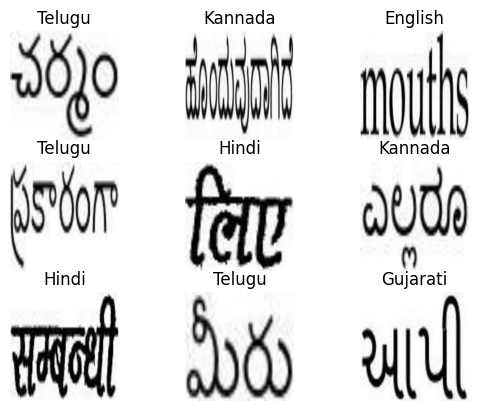

In [10]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
from keras.callbacks import *

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callbacks
)

Epoch 1/10
78/78 [==============================] - 4s 30ms/step - loss: 1.0789 - accuracy: 0.5880 - val_loss: 0.1919 - val_accuracy: 0.9550
Epoch 2/10
78/78 [==============================] - 2s 27ms/step - loss: 0.0672 - accuracy: 0.9847 - val_loss: 0.1287 - val_accuracy: 0.9518
Epoch 3/10
78/78 [==============================] - 2s 30ms/step - loss: 0.0620 - accuracy: 0.9799 - val_loss: 0.1033 - val_accuracy: 0.9646
Epoch 4/10
78/78 [==============================] - 2s 27ms/step - loss: 0.0347 - accuracy: 0.9932 - val_loss: 0.0831 - val_accuracy: 0.9630
Epoch 5/10
78/78 [==============================] - 2s 27ms/step - loss: 0.0183 - accuracy: 0.9956 - val_loss: 0.1409 - val_accuracy: 0.9486
Epoch 6/10
78/78 [==============================] - 2s 27ms/step - loss: 0.0229 - accuracy: 0.9912 - val_loss: 0.1515 - val_accuracy: 0.9405


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

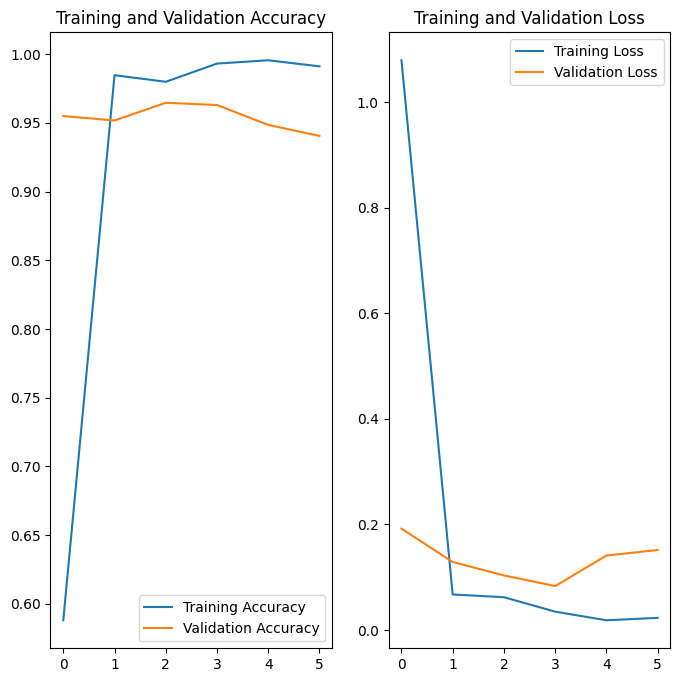

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import os

In [18]:
class_dict = {0:'English',1:'Gujarati', 2:'Hindi', 3:'Kannada',4:'Telugu'}

1/1 [==============================] - 0s 16ms/step


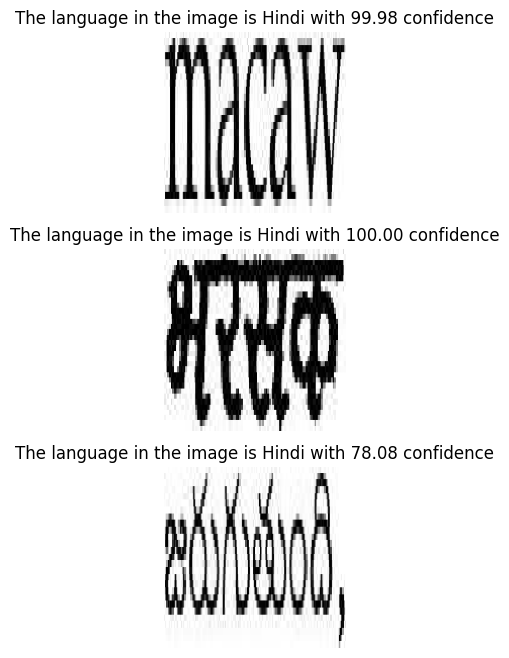

In [ ]:
img_path = "/content/drive/MyDrive/Project/Unseen/"
img_arr = os.listdir(img_path)
# img_arr
plt.figure(figsize=(8,8))
for i in range(len(img_arr)):
  sample_1 = tf.keras.utils.load_img(img_path+img_arr[i],target_size=(img_width,img_height))
  sample = tf.keras.utils.img_to_array(sample_1)
  # sample = sample / 255.
  # sample = np.expand_dims(sample, axis=0)
  # images = np.vstack([sample])
  sample = np.array([sample])
  pred = model.predict(sample)
  score = tf.nn.softmax(pred[0])
  pred_label = class_dict[np.argmax(score)]
  conf = np.max(score)*100
  plt.subplot(len(img_arr),1,i+1)
  plt.imshow(sample_1)
  plt.axis('off')
  plt.title("The language in the image is "+pred_label+" with "+str(format(conf,'.2f'))+" confidence")

In [ ]:
model.save("/content/drive/MyDrive/Project/Models/mvsf.keras")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Project/Models/model_new_3.keras")

1/1 [==============================] - 0s 18ms/step


Text(0.5, 1.0, 'The language in the image is Hindi with 100.00 confidence')

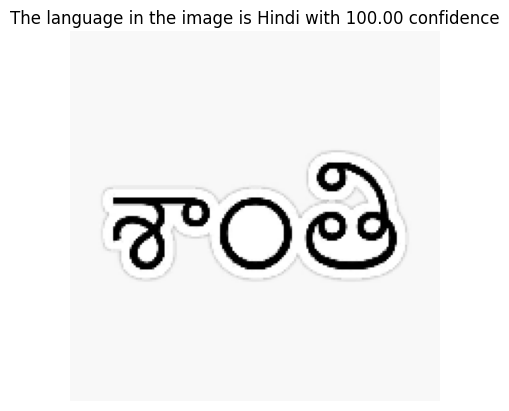

In [ ]:
img_path = "tyu.jpg"
sample_1 = tf.keras.utils.load_img(img_path,target_size=(img_width,img_height))
sample = tf.keras.utils.img_to_array(sample_1)
sample = np.array([sample])
pred = model.predict(sample)
score = tf.nn.softmax(pred[0])
pred_label = class_dict[np.argmax(score)]
conf = np.max(score)*100
# plt.figure(facecolor='black')
plt.imshow(sample_1)
plt.axis('off')
plt.title("The language in the image is "+pred_label+" with "+str(format(conf,'.2f'))+" confidence")

In [ ]:
model1 = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs",activation='softmax')
])

In [ ]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 15
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


133/133 [==============================] - 10s 60ms/step - loss: 0.6112 - accuracy: 0.7890 - val_loss: 0.1285 - val_accuracy: 0.9631
Epoch 2/15
133/133 [==============================] - 8s 60ms/step - loss: 0.0728 - accuracy: 0.9759 - val_loss: 0.0684 - val_accuracy: 0.9754
Epoch 3/15
133/133 [==============================] - 8s 57ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0866 - val_accuracy: 0.9754
Epoch 4/15
133/133 [==============================] - 8s 58ms/step - loss: 0.0089 - accuracy: 0.9969 - val_loss: 0.0639 - val_accuracy: 0.9848
Epoch 5/15
133/133 [==============================] - 8s 58ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0862 - val_accuracy: 0.9678
Epoch 6/15
133/133 [==============================] - 8s 57ms/step - loss: 0.0093 - accuracy: 0.9981 - val_loss: 0.0973 - val_accuracy: 0.9801
Epoch 7/15
133/133 [==============================] - 8s 58ms/step - loss: 0.0265 - accuracy: 0.9936 - val_loss: 0.0470 - val_accuracy: 0.9858
Epoch 8/1

In [ ]:
model.summary()

## Transfer learning

In [ ]:
img_alex = 224

# Resize and normalize images
def preprocess_image(image, label):
    image = tf.image.resize(image, (img_alex, img_alex))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_an = train_ds.map(preprocess_image)
val_an = val_ds.map(preprocess_image)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential([
    # Convolutional Layers
    Conv2D(16, (5, 5), strides=(2,2), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2), strides=(2,2)),

    Conv2D(16, (5, 5), padding="same", activation='relu'),
    MaxPooling2D((3, 3), strides=(2,2)),

    # Fully Connected Layers
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience = 2, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_an, epochs=10, validation_data=val_an, callbacks=[early_stopping])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 110, 110, 16)      1216      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 55, 55, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 55, 55, 16)        6416      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 27, 27, 16)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 11664)             0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience = 2, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_an, epochs=10, validation_data=val_an, callbacks=[early_stopping])

Epoch 1/10
133/133 [==============================] - 5s 29ms/step - loss: 1.3180 - accuracy: 0.4801 - val_loss: 0.8289 - val_accuracy: 0.7898
Epoch 2/10
133/133 [==============================] - 3s 22ms/step - loss: 0.6234 - accuracy: 0.7907 - val_loss: 0.3811 - val_accuracy: 0.9157
Epoch 3/10
133/133 [==============================] - 3s 20ms/step - loss: 0.3601 - accuracy: 0.8933 - val_loss: 0.2603 - val_accuracy: 0.9318
Epoch 4/10
133/133 [==============================] - 3s 24ms/step - loss: 0.2504 - accuracy: 0.9250 - val_loss: 0.2159 - val_accuracy: 0.9394
Epoch 5/10
133/133 [==============================] - 3s 26ms/step - loss: 0.1932 - accuracy: 0.9418 - val_loss: 0.1711 - val_accuracy: 0.9527
Epoch 6/10
133/133 [==============================] - 3s 23ms/step - loss: 0.1480 - accuracy: 0.9596 - val_loss: 0.1402 - val_accuracy: 0.9640
Epoch 7/10
133/133 [==============================] - 3s 25ms/step - loss: 0.1321 - accuracy: 0.9612 - val_loss: 0.1320 - val_accuracy: 0.9555

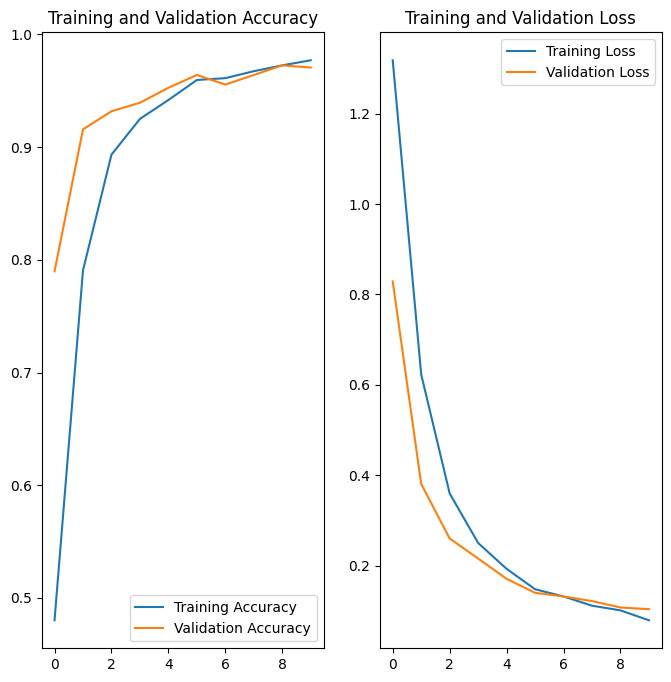

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Project/Models/alexnet.h5",compile=False)

1/1 [==============================] - 0s 17ms/step


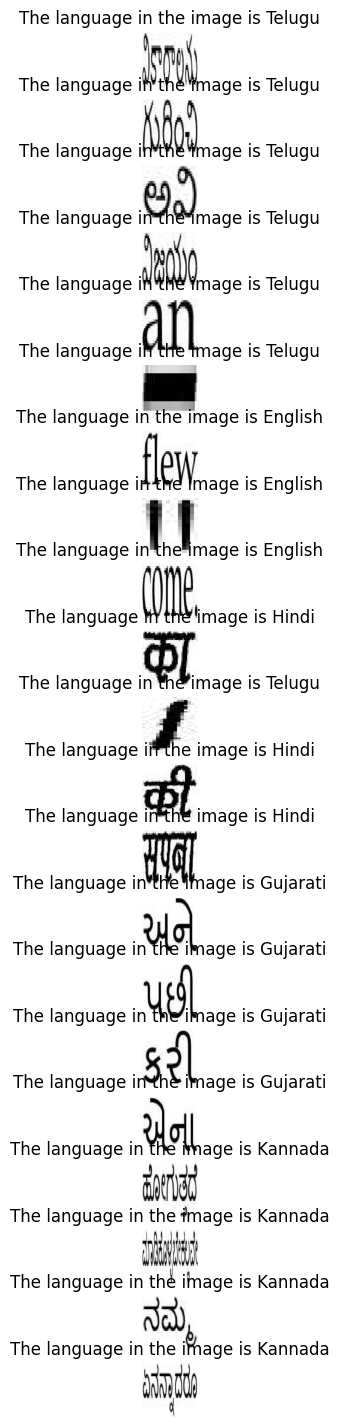

In [ ]:
img_path = "/content/drive/MyDrive/Project/Unseen/"
img_arr = os.listdir(img_path)
# img_arr
plt.figure(figsize=(18,18))
for i in range(len(img_arr)):
  sample_1 = tf.keras.utils.load_img(img_path+img_arr[i],target_size=(img_alex,img_alex))
  sample = tf.keras.utils.img_to_array(sample_1)
  # sample = sample / 255.
  # sample = np.expand_dims(sample, axis=0)
  # images = np.vstack([sample])
  sample = np.array([sample])
  pred = model.predict(sample)
  score = tf.nn.softmax(pred[0])
  pred_label = class_dict[np.argmax(score)]
  conf = np.max(score)*100
  plt.subplot(len(img_arr),1,i+1)
  plt.imshow(sample_1)
  plt.axis('off')
  plt.title("The language in the image is "+pred_label)

In [ ]:
# Save in HDF5 format
model.save('alexnet_5.h5')

In [15]:
img_alex = 224

In [13]:
model = tf.keras.models.load_model("alexnet_5.h5",compile=False)

1/1 [==============================] - 0s 17ms/step


Text(0.5, 1.0, 'The language in the image is Telugu')

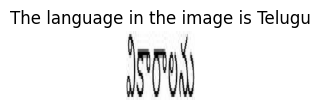

In [19]:
img_path = "/content/drive/MyDrive/Project/Unseen/"
img_arr = os.listdir(img_path)[0]
plt.figure(figsize=(18,18))
sample_1 = tf.keras.utils.load_img(img_path+img_arr,target_size=(img_alex,img_alex))
sample = tf.keras.utils.img_to_array(sample_1)
sample = np.array([sample])
pred = model.predict(sample)
score = tf.nn.softmax(pred[0])
pred_label = class_dict[np.argmax(score)]
conf = np.max(score)*100
plt.subplot(len(img_arr),1,i+1)
plt.imshow(sample_1)
plt.axis('off')
plt.title("The language in the image is "+pred_label)